In [30]:
# Importing necessary libraries
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from __future__ import print_function

%matplotlib inline

## Загрузим данные

In [4]:
df_out = pd.read_csv('Data/LHCb_PID_obscured.csv')

In [5]:
# Let's look at our data set
vars_list = list(df_out.keys())
df_out.head()

,pid,S5aux0,S3aux0,S2aux0,S0aux0,S0aux1,S0aux2,S0aux3,S2aux1,S2aux2,...,S4x1,S4x2,S3x2,S4x3,S4x4,S5x1,S5x2,S5x3,S5x4,S4x5
0,a,1.0,1.0,1.0,12.470869,16.0,1.498864,4.0,0.0,0.0,...,43124.0,1.0,4497.850098,1696.200195,0.195356,1.046679,538.357971,35546.0,1.0,655.779785
1,f,1.0,-999.0,-999.0,2.611352,6.0,8.613868,9.0,-999.0,-999.0,...,-999.0,-999.0,-999.000000,-999.000000,-999.000000,0.942609,745.686462,35684.0,0.0,-999.000000
2,c,1.0,1.0,1.0,15.694536,17.0,5.911904,7.0,1.0,1.0,...,35553.0,1.0,566.271973,1401.664062,0.538877,0.841611,811.178467,35799.0,0.0,-2616.123047
3,d,-999.0,1.0,1.0,12.244493,14.0,2.455816,3.0,0.0,0.0,...,39028.0,1.0,4894.333984,85.869995,1.656766,-999.000000,-999.000000,-999.0,-999.0,230.555283
4,c,1.0,-999.0,-999.0,22.676029,19.0,4.777353,5.0,-999.0,-999.0,...,-999.0,-999.0,-999.000000,-999.000000,-999.000000,0.968089,1529.644287,34142.0,1.0,-999.000000


## Изучим данные

In [4]:
# See how many examples of the different particles we have
# a is one type of particle like a muon, b is another
print(df_out['pid'].value_counts().sort_index())
print("\nTotal number of samples :\t", len(df_out))

a    545384
b    545384
c    545384
d    545384
e    545384
f    545384
Name: pid, dtype: int64

Total number of samples :	 3272304


(-300, 20000)

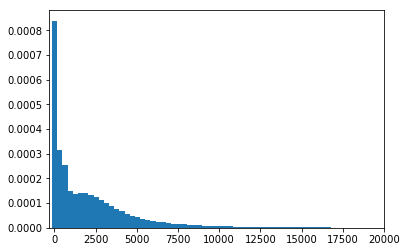

In [27]:
plt.hist(df_out[df_out['S3x2'] != -999]['S3x2'], bins=1000, normed=True)
plt.xlim((-300, 20000))

(-300, 20000)

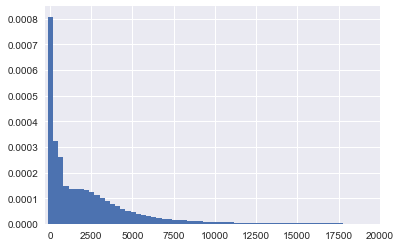

In [74]:
plt.hist(df_out[(df_out['S3x2'] != -999) & (df_out['pid'] != 'd')]['S3x2'], bins=1000, normed=True)
plt.xlim((-300, 20000))

(-300, 20000)

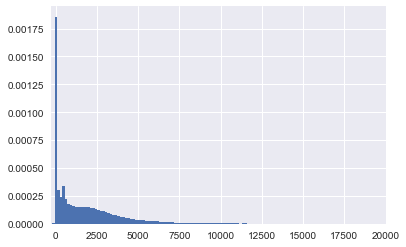

In [75]:
plt.hist(df_out[(df_out['S3x2'] != -999) & (df_out['pid'] == 'd')]['S3x2'], bins=1000, normed=True)
plt.xlim((-300, 20000))

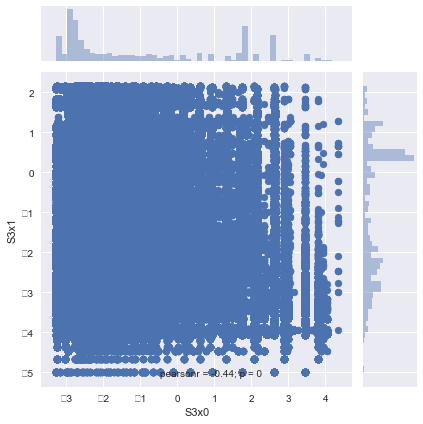

In [77]:
sns.jointplot(df_out[df_out['S3x0'] != -999]['S3x0'], df_out[df_out['S3x1'] != -999]['S3x1'])

Посмотрим на корреляцию признаков

In [39]:
sorted_keys = sorted(filter(lambda var: 'aux' not in var and 'pid' not in var, vars_list), 
                     key=lambda t: int(t[1]) * 100 + int(t[3:]) * 1)
sorted_keys.extend(sorted(filter(lambda var: 'aux' in var, vars_list), 
                          key=lambda t: int(t[1]) * 100 + int(t[5:]) * 1))

In [41]:
print(sorted_keys)

['S0x0', 'S0x1', 'S0x2', 'S0x3', 'S0x4', 'S0x5', 'S0x6', 'S0x7', 'S0x8', 'S0x9', 'S0x10', 'S1x0', 'S1x1', 'S1x2', 'S1x3', 'S1x4', 'S1x5', 'S2x0', 'S2x1', 'S2x2', 'S2x3', 'S3x0', 'S3x1', 'S3x2', 'S4x0', 'S4x1', 'S4x2', 'S4x3', 'S4x4', 'S4x5', 'S5x0', 'S5x1', 'S5x2', 'S5x3', 'S5x4', 'S0aux0', 'S0aux1', 'S0aux2', 'S0aux3', 'S0aux4', 'S0aux5', 'S0aux6', 'S0aux7', 'S0aux8', 'S2aux0', 'S2aux1', 'S2aux2', 'S2aux3', 'S3aux0', 'S5aux0']


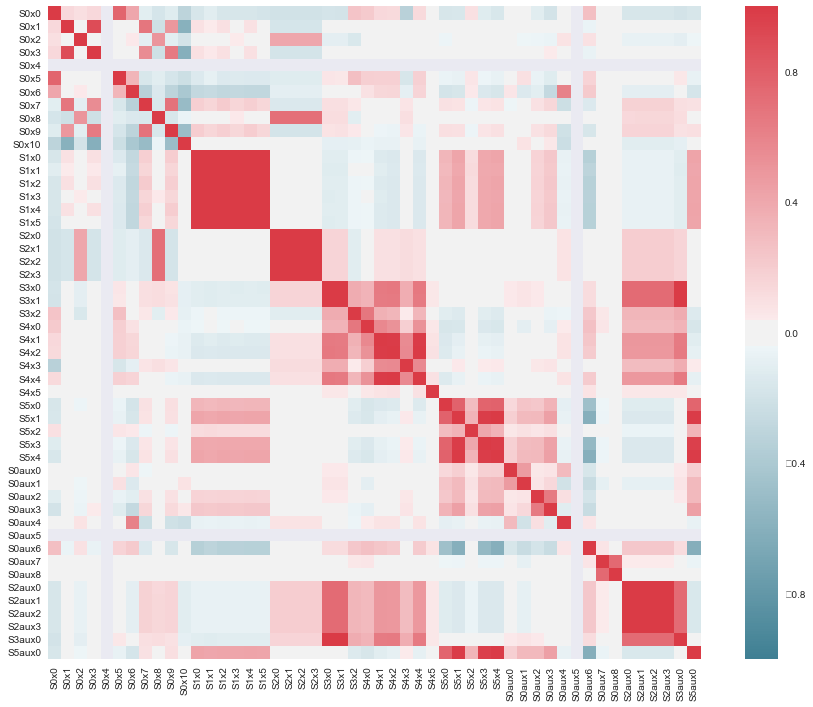

In [49]:
f, ax = plt.subplots(figsize=(16, 12))
corr = df_out.corr()
sns.heatmap(corr.loc[sorted_keys, sorted_keys], square=True, ax=ax, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True))

Добавим в матрицу корреляций метки частиц

In [66]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder()
ohe = OneHotEncoder(sparse=False)
tmp = pd.DataFrame(
    ohe.fit_transform(le.fit_transform(df_out.pid.values.reshape(-1, 1)).reshape(-1, 1)),
    columns=['pid=' + str(pid) for pid in le.classes_]
)

/home/mivakhnenko/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
tmp.head()

,pid=a,pid=b,pid=c,pid=d,pid=e,pid=f
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


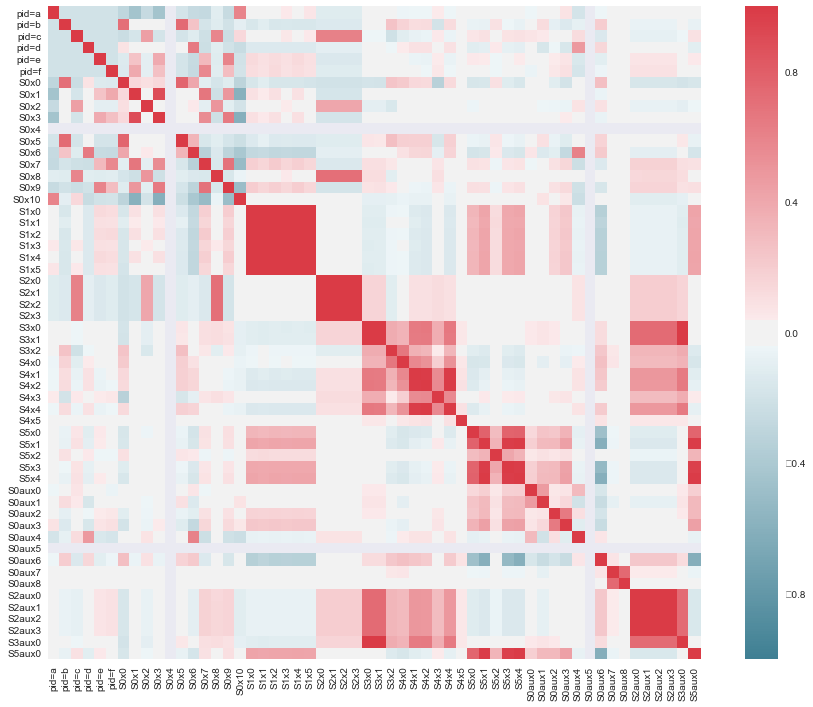

In [70]:
f, ax = plt.subplots(figsize=(16, 12))
corr = pd.concat([df_out, tmp], axis=1).corr()
sns.heatmap(corr.loc[list(tmp.keys()) + sorted_keys, list(tmp.keys()) + sorted_keys], square=True, ax=ax, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True))

Возьмем значения по модулю, чтобы не обращать внимание на обратную корреляцию

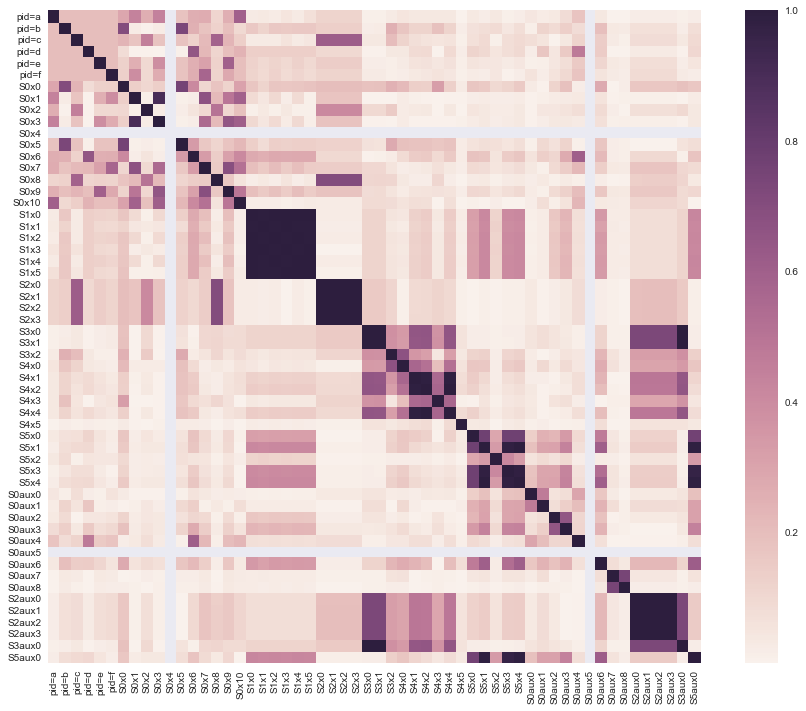

In [72]:
f, ax = plt.subplots(figsize=(16, 12))
corr = pd.concat([df_out, tmp], axis=1).corr()
sns.heatmap(corr.loc[list(tmp.keys()) + sorted_keys, list(tmp.keys()) + sorted_keys].abs(), square=True, ax=ax)

In [81]:
[key for key in df_out_with]

['any', 'S1', 'S2', 'S3', 'S4', 'S5', 'all_systems']

In [83]:
print(vars_list)

['pid', 'S5aux0', 'S3aux0', 'S2aux0', 'S0aux0', 'S0aux1', 'S0aux2', 'S0aux3', 'S2aux1', 'S2aux2', 'S2aux3', 'S0aux4', 'S0aux5', 'S0aux6', 'S0aux7', 'S0aux8', 'S0x0', 'S0x1', 'S0x2', 'S0x3', 'S0x4', 'S3x0', 'S3x1', 'S2x0', 'S2x1', 'S2x2', 'S2x3', 'S0x5', 'S0x6', 'S0x7', 'S0x8', 'S0x9', 'S0x10', 'S1x0', 'S1x1', 'S1x2', 'S1x3', 'S1x4', 'S1x5', 'S5x0', 'S4x0', 'S4x1', 'S4x2', 'S3x2', 'S4x3', 'S4x4', 'S5x1', 'S5x2', 'S5x3', 'S5x4', 'S4x5']


In [79]:
# There is missing data, which is denoted by a value of -999
# Lets check out the structure of the data
# There are several groups of data that are either missing or not denoted S1, S2, ... 
# Features with the prefex S0 are always present
# Features with aux in the name are auxiliary features and do not need to be compressed.

df_out_with = collections.OrderedDict()

#df_out_with['all'] = df_out
df_out_with['any'] = df_out.loc[
    (df_out['S1x1']!=-999) | (df_out['S2x2']!=-999) | (df_out['S3x0']!=-999)  
    | (df_out['S4x1']!=-999) | (df_out['S5x3']!=-999)
]


df_out_with['S1'] = df_out.loc[df_out['S1x1']!=-999]
df_out_with['S2'] = df_out.loc[df_out['S2x2']!=-999]
df_out_with['S3'] = df_out.loc[df_out['S3x0']!=-999]
df_out_with['S4'] = df_out.loc[df_out['S4x1']!=-999]
df_out_with['S5'] = df_out.loc[df_out['S5x3']!=-999]
df_out_with['all_systems'] = df_out.loc[
    (df_out['S1x1']!=-999) & (df_out['S2x2']!=-999) & (df_out['S3x0']!=-999) 
    & (df_out['S4x1']!=-999) & (df_out['S5x3']!=-999)
]


d_n_examples = collections.OrderedDict()
for key in df_out_with:
    d_n_examples[key] = 1.*len(df_out_with[key])
    
group_members = collections.OrderedDict()
for key in df_out_with:
    group_members[key] = []


for v in vars_list:
#     print len(df_out[v]==-999), l_df_out
    ASSOCIATED = False
    for key in df_out_with:
        if not ASSOCIATED and len(df_out_with[key].loc[df_out_with[key][v]==-999])/d_n_examples[key] == 0: 
            group_members[key].append(v)
            ASSOCIATED = True

    if not ASSOCIATED:
        s = "{0:30} \t".format(v)
        for key in df_out_with:
             s += "{0:.2f}\t".format(len(df_out_with[key].loc[df_out_with[key][v]==-999])/d_n_examples[key])
        print (s)
#'''

#print  (len(df_out_withecal.loc[df_out_withecal["trks_S_CaloPrsE"]==-999]) )
print("\n\n")
print("Groups : ")
for key in group_members:
    print(key, group_members[key])
    
print("\n\nNumber of examples in each group: ", d_n_examples)




Groups : 
any ['pid', 'S0aux0', 'S0aux1', 'S0aux2', 'S0aux3', 'S0aux4', 'S0aux5', 'S0aux6', 'S0aux7', 'S0aux8', 'S0x0', 'S0x1', 'S0x2', 'S0x3', 'S0x4', 'S0x5', 'S0x6', 'S0x7', 'S0x8', 'S0x9', 'S0x10']
S1 ['S1x0', 'S1x1', 'S1x2', 'S1x3', 'S1x4', 'S1x5']
S2 ['S2aux0', 'S2aux1', 'S2aux2', 'S2aux3', 'S2x0', 'S2x1', 'S2x2', 'S2x3']
S3 ['S3aux0', 'S3x0', 'S3x1', 'S3x2']
S4 ['S4x0', 'S4x1', 'S4x2', 'S4x3', 'S4x4', 'S4x5']
S5 ['S5aux0', 'S5x0', 'S5x1', 'S5x2', 'S5x3', 'S5x4']
all_systems []


Number of examples in each group:  OrderedDict([('any', 3272304.0), ('S1', 3082975.0), ('S2', 435455.0), ('S3', 2676986.0), ('S4', 2154418.0), ('S5', 2532945.0), ('all_systems', 263979.0)])


In [80]:
# Choose some subset of the data to compress as an example. For the normal use case we want to compress them all. 
df_out_example = df_out[
    ['pid'] + list(
        set(group_members['any'] + group_members['S1'] + group_members['S3'])
        - set(["S0aux5", "pid", "S0x4", "S3aux0", "S1x5"])
    )][(df_out['S1x1'] != -999) & (df_out['S3x0'] != -999) ]
# print (df_out_ecal_rich.head())
print ("SHAPE : ", df_out_example.shape)
print (df_out_example['pid'].value_counts().sort_index())

SHAPE :  (2487657, 27)
a    438012
b    358002
c    408195
d    377725
e    450775
f    454948
Name: pid, dtype: int64


In [25]:
df_out_example.to_csv("Data/Df_example.csv", index=False)     

df_out_example_10perc = df_out_example.sample(frac=0.1, replace=False)
df_out_example_10perc.to_csv("Data/Df_example_10perc.csv", index=False)

df_out_example_1perc = df_out_example.sample(frac=0.01, replace=False)
df_out_example_1perc.to_csv("Data/Df_example_1perc.csv", index=False)

df_out_example_100 = df_out_example.sample(frac=100./df_out_example.shape[0], replace=False)
df_out_example_100.to_csv("Data/Df_example_100.csv", index=False)